In [1]:
#Veri Analizi

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Model

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

C:\Users\samsung\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
tablet = pd.read_csv("tablet.csv")
df = tablet.copy()
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [4]:
df.isnull().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


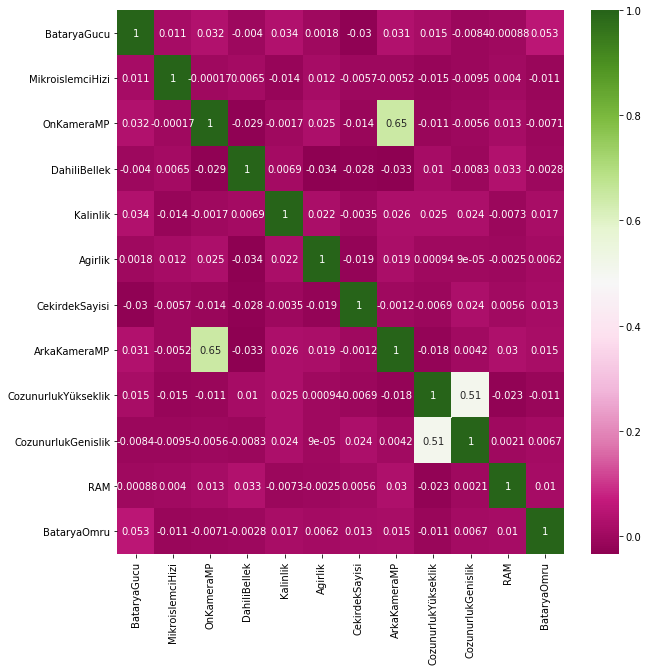

In [6]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "PiYG" );

In [7]:
df.groupby("FiyatAraligi").RAM.describe() # Rami eksik olan tabletlerirn hepsi pahalı

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,2582.81600,496.211735,1185.0,2292.75,2577.0,2927.00,3916.0
Pahalı,488.0,3449.35041,390.975480,2259.0,3207.50,3504.5,3764.75,3998.0
Ucuz,500.0,1679.49000,465.850159,387.0,1354.00,1686.5,2033.75,2811.0
Çok Ucuz,500.0,785.31400,362.755397,256.0,488.75,719.5,1037.00,1974.0


In [8]:
df["RAM"].fillna(df.groupby("FiyatAraligi")["RAM"].transform("mean"), inplace = True) 
# Eksik verileri pahalı tabletlerin ort. değeri ile doldurdum

In [9]:
df.groupby("FiyatAraligi").OnKameraMP.describe() # On Kamerası eksik olan tabletlerirn hepsi çok ucuz

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,4.498000,4.347390,0.0,1.0,3.0,7.0,18.0
Pahalı,500.0,4.316000,4.332399,0.0,1.0,3.0,7.0,18.0
Ucuz,500.0,4.340000,4.499432,0.0,1.0,3.0,7.0,18.0
Çok Ucuz,495.0,4.092929,4.185411,0.0,1.0,3.0,6.0,19.0


In [10]:
df["OnKameraMP"].fillna(df.groupby("FiyatAraligi")["OnKameraMP"].transform("mean"), inplace = True) 
# Eksik verileri çok ucuz tabletlerin ort. değeri ile doldurdum

In [11]:
df.isnull().sum()

BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             0
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
Renk                   0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,2000.0,4.311732,4.336675,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [13]:
df["FiyatAraligi"].value_counts() 

Normal      500
Pahalı      500
Ucuz        500
Çok Ucuz    500
Name: FiyatAraligi, dtype: int64

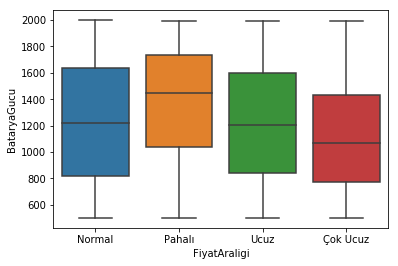

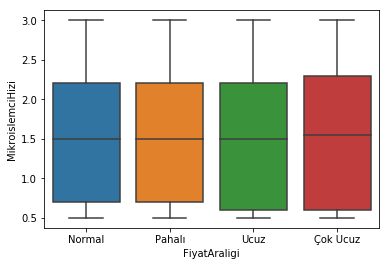

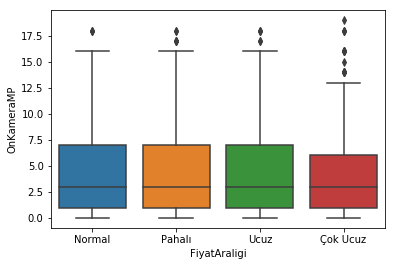

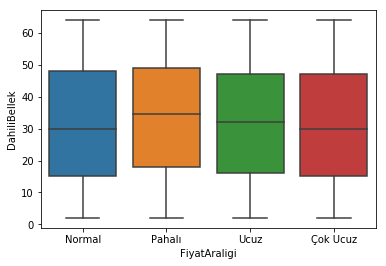

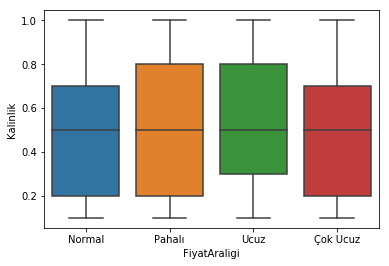

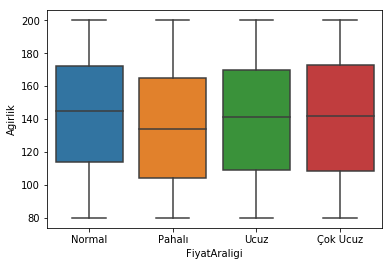

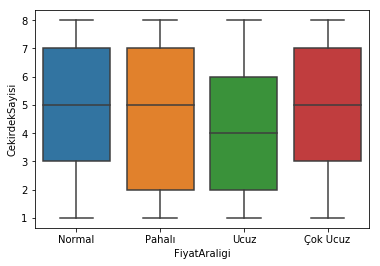

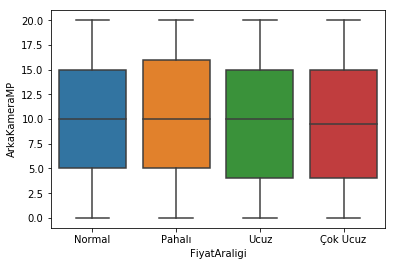

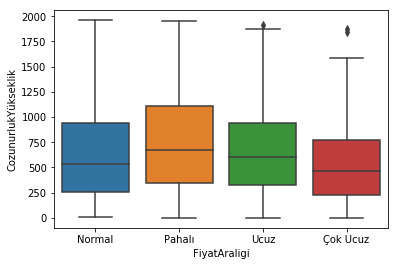

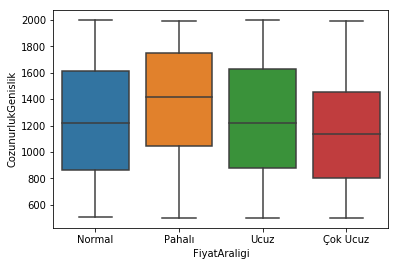

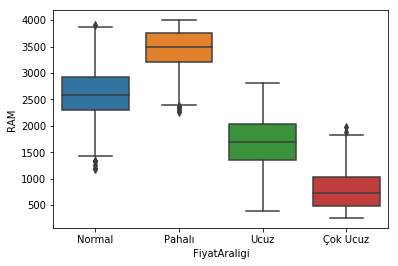

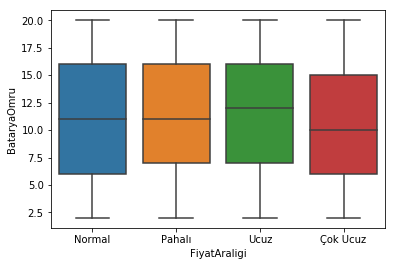

In [14]:
for col in df.select_dtypes(include="number").columns:
    #plt.figure(figsize = (10,5))
    sns.boxplot(x = "FiyatAraligi" , y = col, data = df)
    plt.show()

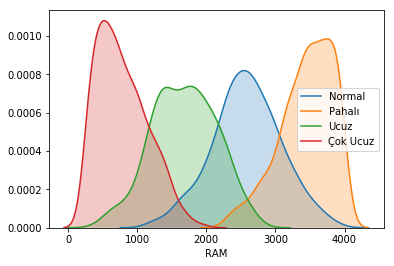

In [15]:
for price in df["FiyatAraligi"].unique():
    sns.distplot(df[df["FiyatAraligi"] == price]["RAM"],hist = False, label= price, kde_kws = {"shade" : True});

## Outlier Detection

In [16]:
df.shape

(2000, 20)

In [17]:
for col in df.iloc[:,[0,2,4,6,7,8,9,10,11,12,13,14]]:
    for price in df["FiyatAraligi"].unique():
        selected_price = df[df["FiyatAraligi"] == price]
        selected_column = selected_price[col]
        
        q1 = selected_column.quantile(0.25)
        q3 = selected_column.quantile(0.75)
        iqr = q3-q1
        
        minimum = q1 - (iqr*1.5)
        maximum = q3 + (iqr*1.5)
        
        max_indexes = df[(df["FiyatAraligi"] == price) & (df[col] > maximum)].index
        min_indexes = df[(df["FiyatAraligi"] == price) & (df[col] < minimum)].index
        
        df.drop(index = max_indexes,inplace=True)
        df.drop(index = min_indexes,inplace=True)   

In [18]:
df.shape

(1953, 20)

In [19]:
df.reset_index(drop=True)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1949,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1950,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1951,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz


## LOF

In [20]:
from sklearn.neighbors import LocalOutlierFactor

In [21]:
df_numeric = df.iloc[:,[0,2,4,6,7,8,9,10,11,12,13,14]]
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1) 
clf.fit_predict(df_numeric)
df_scores = clf.negative_outlier_factor_ 
np.sort(df_scores)[0:10] 

array([-1.42022827, -1.41600834, -1.29331919, -1.28811146, -1.28409773,
       -1.27446519, -1.26320086, -1.23985917, -1.22763541, -1.21449711])

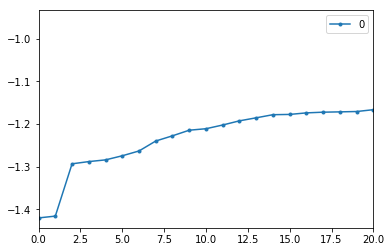

In [22]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim = [0,20], style=".-")
plt.show()

In [23]:
threshold = np.sort(df_scores)[1]
outliers = df[df_scores <= threshold]

In [24]:
outliers

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
432,1930,Var,2.0,Yok,11.0,Yok,16,0.8,186,8,12,1901,1920,1783.0,13,Yok,Yok,Var,Normal,Beyaz
1313,541,Yok,1.0,Yok,0.0,Var,10,0.4,127,4,0,1836,1873,1019.0,15,Var,Var,Yok,Ucuz,Pembe


In [25]:
threshold = np.sort(df_scores)[1]
df = df[df_scores > threshold]

In [26]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [27]:
df.shape

(1951, 20)

In [28]:
df.reset_index(drop = True)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1947,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1948,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1949,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz


## Label Encoder

In [29]:
df["FiyatAraligi"].value_counts() 

Ucuz        493
Pahalı      489
Normal      488
Çok Ucuz    481
Name: FiyatAraligi, dtype: int64

In [30]:
label_encoder = preprocessing.LabelEncoder()

In [31]:
df['Bluetooth'] = label_encoder.fit_transform(df['Bluetooth'])
df['CiftHat'] = label_encoder.fit_transform(df['CiftHat'])
df['4G'] = label_encoder.fit_transform(df['4G'])
df['3G'] = label_encoder.fit_transform(df['3G'])
df['Dokunmatik'] = label_encoder.fit_transform(df['Dokunmatik'])
df['WiFi'] = label_encoder.fit_transform(df['WiFi'])
df['Renk'] = label_encoder.fit_transform(df['Renk'])

# Model Training

In [32]:
y = df["FiyatAraligi"]
X = df.drop("FiyatAraligi", axis = 1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Random Forest : 88.31

In [34]:
model = RandomForestClassifier().fit(X_train, y_train)

In [35]:
y_preds = model.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(accuracy_score(y_test,y_preds))

[[ 96   8  10   0]
 [  7 112   0   0]
 [ 13   0  92  14]
 [  0   0   5 131]]
              precision    recall  f1-score   support

      Normal       0.83      0.84      0.83       114
      Pahalı       0.93      0.94      0.94       119
        Ucuz       0.86      0.77      0.81       119
    Çok Ucuz       0.90      0.96      0.93       136

    accuracy                           0.88       488
   macro avg       0.88      0.88      0.88       488
weighted avg       0.88      0.88      0.88       488

0.8831967213114754


## KNN : 91.59

In [36]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)

In [37]:
y_preds = knn_model.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(accuracy_score(y_test,y_preds))

[[100   8   6   0]
 [  8 111   0   0]
 [  7   0 101  11]
 [  0   0   1 135]]
              precision    recall  f1-score   support

      Normal       0.87      0.88      0.87       114
      Pahalı       0.93      0.93      0.93       119
        Ucuz       0.94      0.85      0.89       119
    Çok Ucuz       0.92      0.99      0.96       136

    accuracy                           0.92       488
   macro avg       0.92      0.91      0.91       488
weighted avg       0.92      0.92      0.92       488

0.9159836065573771


## GBM : 89.75

In [38]:
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)

In [39]:
y_preds = gbm_model.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(accuracy_score(y_test,y_preds))

[[ 96  11   7   0]
 [  6 113   0   0]
 [ 11   0  96  12]
 [  0   0   3 133]]
              precision    recall  f1-score   support

      Normal       0.85      0.84      0.85       114
      Pahalı       0.91      0.95      0.93       119
        Ucuz       0.91      0.81      0.85       119
    Çok Ucuz       0.92      0.98      0.95       136

    accuracy                           0.90       488
   macro avg       0.90      0.89      0.89       488
weighted avg       0.90      0.90      0.90       488

0.8975409836065574


## Decision Tree : 85.24

In [40]:
decision_model = DecisionTreeClassifier().fit(X_train,y_train)

In [41]:
y_preds = decision_model.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(accuracy_score(y_test,y_preds))

[[ 89  17   8   0]
 [ 11 108   0   0]
 [ 16   0  88  15]
 [  0   0   5 131]]
              precision    recall  f1-score   support

      Normal       0.77      0.78      0.77       114
      Pahalı       0.86      0.91      0.89       119
        Ucuz       0.87      0.74      0.80       119
    Çok Ucuz       0.90      0.96      0.93       136

    accuracy                           0.85       488
   macro avg       0.85      0.85      0.85       488
weighted avg       0.85      0.85      0.85       488

0.8524590163934426


# Model Tuning - KNN : 93.44

In [42]:
knn_params = {"n_neighbors" : np.arange(1,30)}

In [43]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,knn_params,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [44]:
knn_cv.best_params_

{'n_neighbors': 9}

In [45]:
knn = KNeighborsClassifier(9)
knn_tuned = knn.fit(X_train,y_train)

In [46]:
y_preds = knn_tuned.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(accuracy_score(y_test,y_preds))

[[103   6   5   0]
 [  5 114   0   0]
 [  6   0 104   9]
 [  0   0   1 135]]
              precision    recall  f1-score   support

      Normal       0.90      0.90      0.90       114
      Pahalı       0.95      0.96      0.95       119
        Ucuz       0.95      0.87      0.91       119
    Çok Ucuz       0.94      0.99      0.96       136

    accuracy                           0.93       488
   macro avg       0.93      0.93      0.93       488
weighted avg       0.93      0.93      0.93       488

0.9344262295081968


In [47]:
accuracy_rate = []
for i in range (1,30):
    knn_model = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_preds = knn_model.predict(X_test)
    accuracy_rate.append(np.mean(y_preds == y_test))

Text(0, 0.5, 'Accuray Rate')

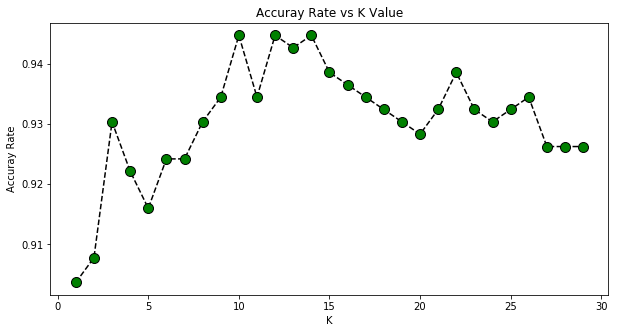

In [48]:
plt.figure(figsize =(10,5))
plt.plot(range(1,30),accuracy_rate, color="black",linestyle="dashed",marker="o",markerfacecolor = "green",markersize =10)
plt.title("Accuray Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Accuray Rate")